<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_ClarkeAndInverseTransformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector: Clarke Transformation and Inverse</h1></b>

Dr. Bingsen Wang

7/24/2024
</center>

#Three-Phase Variables

In three-phase power systems, the voltages are typically sinusoidal. The three phase voltages $v_a,v_b,v_c$ form a postive sequence if they have the same amplitude and frequency and different phase angles with $v_a$ leading $v_b$ by 120 degrees and $v_b$ leading $v_c$ by 120 degrees.
$$\begin{align}
v_a &= V\cos\left(\omega_e t+\theta \right)\\
v_b &= V\cos\left(\omega_e t+\theta - \frac{2\pi}{3} \right)\\
v_c &= V\cos\left(\omega_e t+\theta + \frac{2\pi}{3} \right)
\end{align}\tag{1}$$

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over3}\left(f_a + f_be^{j\frac{2\pi}{3}} + f_ce^{j\frac{4\pi}{3}}\right)\tag{2}$$
where $f_a,f_b,f_c$ are the three-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

##Space Vector in Stationary Reference Frame

With reference to (1) and (2), the voltage space vector in stationary reference frame is
$$\begin{align}
\underline v_{\alpha\beta} &= {2\over3}\left(v_a + v_be^{j\frac{2\pi}{3}} + v_ce^{j\frac{4\pi}{3}}\right)\\
&= {2V\over3}\left[\cos\left(\omega_e t+\theta\right) + \cos\left(\omega_e t+\theta - \frac{2\pi}{3} \right)e^{j\frac{2\pi}{3}} + \cos\left(\omega_e t+\theta + \frac{2\pi}{3} \right)e^{j\frac{4\pi}{3}}\right]
\end{align}\tag{3}$$

Based on Euler's identity $e^{jx}=\cos x + j\sin x$, the cosine function can be written in terms exponential functions.
$$\cos x = \frac{e^{jx} + e^{-jx}}{2}\tag{4}$$

Hence, (3) can be rewritten as
$$\begin{align}\underline v_{\alpha\beta} &= {2V\over3\times2}\begin{bmatrix}
e^{j\left(\omega_e t+\theta\right)} + e^{j\left(\omega_e t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{j\left(\omega_e t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}+\\
e^{-j\left(\omega_e t+\theta\right)} + e^{-j\left(\omega_e t+\theta-\frac{2\pi}{3}\right)}e^{j\frac{2\pi}{3}} + e^{-j\left(\omega_e t+\theta+\frac{2\pi}{3}\right)}e^{j\frac{4\pi}{3}}
\end{bmatrix}\\
&= Ve^{j(\omega_e t+\theta)}
\end{align}\tag{5}$$

#Python Code
The Python code illustrates the Clarke transformation and inverse.

0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
0


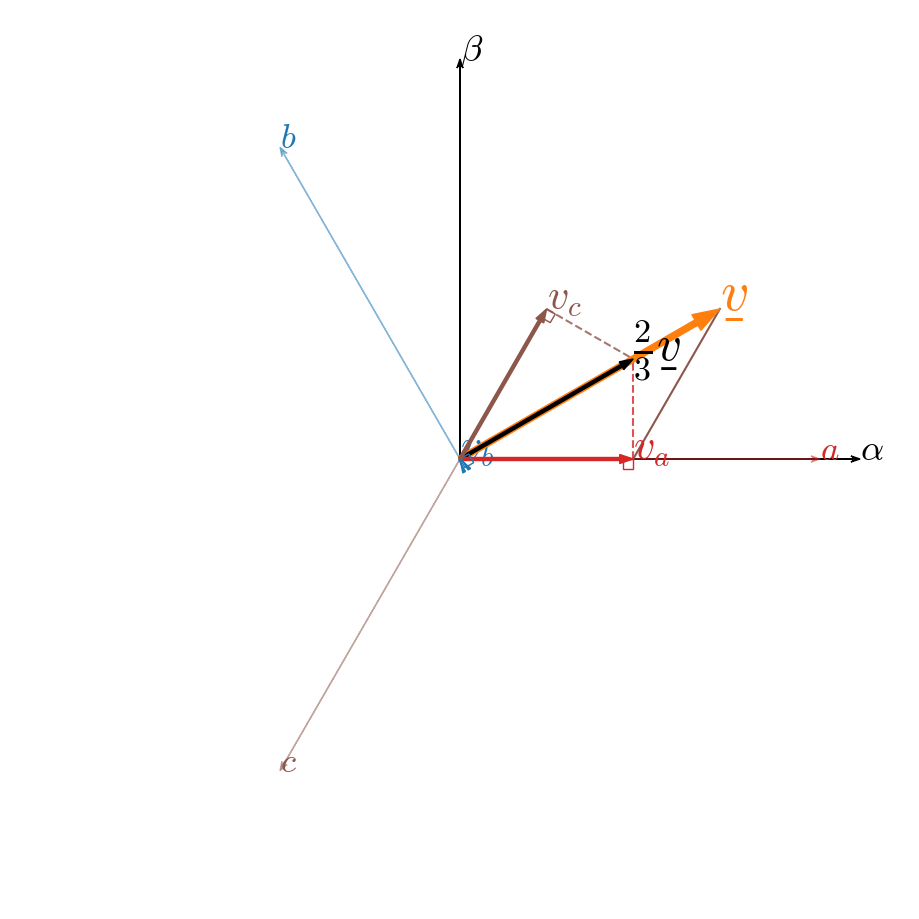

In [45]:
from operator import eq
import matplotlib
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib import animation,rc,transforms
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

alps = [1,exp(1j*2*pi/3),exp(1j*4*pi/3)] #alphas
def v_abc(V,w,t,theta): #voltages in abc
  return V*array([cos(w*t+theta-k*2*pi/3) for k in range(3)])
def abc2ab(abc): #Clarke transformation, abc to alpha-beta
  return 2/3*(abc[0]*alps[0]+abc[1]*alps[1]+abc[2]*alps[2])
def ab2qd(ab,w,t): #Park transformation, alpha-beta to d-q
  return ab*exp(-1j*w*t)
def drawArrow(ax,xy,mag,theta,arrowstyle,color,alpha):
  rot=transforms.Affine2D().rotate_around(xy[0],xy[1],theta)+axs[0].transData
  ax.add_patch(fa(xy[0],xy[1],mag,0,**arrowstyle,transform=rot,color=color,alpha=alpha))
  return

#parameters
Nfps = 900
V,fe,theta = 3,1,pi/6 #voltage amplitude,frequency,phase
t=linspace(0,2/fe,Nfps)
wt = 2*pi*fe*t #angular frequency
vabc=v_abc(V,2*pi*fe,t,theta) #voltages in abc
vab=abc2ab(vabc) #spac vector in alpha-beta
vqd=ab2qd(vab,2*pi*fe,t) #space vector in d-q

#plotting
xymax,xylim = 4,[-4.5,4.5]
clst=['tab:red','tab:blue','tab:brown','tab:green','tab:olive','tab:orange','k','w'] #colors light bg
tns = ['$a$','$b$','$c$',r'$\alpha$',r'$\beta$','$d$','$q$',r'$v_\alpha$',
       r'$v_\beta$',r'$v_a$',r'$v_b$',r'$v_c$'] #labels
fig = plt.figure(figsize=(9,9))
axs,lines,txts = [],[],[]
as1 = {'head_width':.06,'length_includes_head':True,'overhang':.5} #arr style
as2 = {'width':.06,'length_includes_head':True} #arr style
as3 = {'width':.03,'length_includes_head':True} #arr style
for k in range(2):
  axs.append(fig.add_axes((0,0,1,1),xlim=xylim,ylim=xylim,fc='none'))
  drawArrow(axs[0],(0,0),xymax,pi/2*k,as1,clst[-2],1)
  axs[0].text((1-k)*xymax,k*xymax,tns[k+3],size=26) #ax labels
axs[0].set_axis_off()
lines.append(axs[0].plot([],[],'-',lw=3,color=clst[3])[0]) #v_alpha, v_beta
for k in range(3):
  rot=transforms.Affine2D().rotate_around(0,0,2*pi/3*k-pi/2)+axs[0].transData
  lines.append(axs[0].plot([],[],'-',lw=2,transform=rot,color=clst[k],alpha=0.4)[0])
  lines.append(axs[0].plot([],[],'--',lw=1.5,transform=rot,color=clst[k],alpha=0.8)[0])
  lines.append(axs[0].plot([],[],'--',lw=1.5,color=clst[k],alpha=0.8)[0])
  lines.append(axs[0].plot([],[],'-',lw=1.5,color=clst[k])[0])
  drawArrow(axs[0],(0,0),xymax*.9,2*pi/3*k,as1,clst[k],.5) #abc-ax
  txts.append(axs[0].text(0,0,tns[9+k],size=30,transform=rot,color=clst[k]))
  axs[0].text(.9*xymax*alps[k].real,.9*xymax*alps[k].imag,tns[k],size=25,color=clst[k]) #abc ax labels

def drawVectors_srf(ax,xymax,vabc,vab,vqd,wt,clst): # in stationary reference frame
  ax.clear()
  ax.set_xlim(xylim)
  ax.set_ylim(xylim)
  ax.axis('off')
  ax.add_patch(fa(0,0,vab.real, vab.imag, **as2,color=clst[-3])) #sv_ab
  ax.text(vab.real,vab.imag,r'$v\underbar$',size = 40,color=clst[-3])
  ax.add_patch(fa(0,0,vab.real*2/3, vab.imag*2/3, **as3,color=clst[-2])) #scaled
  ax.text(vab.real*2/3,vab.imag*2/3,r'$\frac{2}{3}v\underbar$',size = 35,color=clst[-2])
  for k in range(3):
    rot=transforms.Affine2D().rotate_around(0,0,2*pi/3*k)+ax.transData
    ax.add_patch(fa(0,0,vabc[k]*2/3,0,**as3,transform=rot,color=clst[k]))
    ax.add_patch(mp.Rectangle((vabc[k]*2/3,0),0.1,0.1,angle=180*np.heaviside(vabc[k],0),rotation_point='xy',transform=rot,color=clst[k],fc='none'))
  return

# animation function. This is called sequentially
def animate(i):
  if i%30==0: print(i) #for monitoring the progress
  lines[0].set_data(vab[:i+1].real,vab[:i+1].imag)
  for k in range(3):
    lines[4*k+1].set_data(.6*t[:i+1]/t[-1]*xymax,vabc[k,:i+1]*2/3) #va,b,c
    lines[4*k+2].set_data([0,.6*t[i]/t[-1]*xymax],[vabc[k,i]*2/3,vabc[k,i]*2/3])
    lines[4*k+3].set_data([vabc[k,i]*alps[k].real*2/3,vab[i].real*2/3],[vabc[k,i]*alps[k].imag*2/3,vab[i].imag*2/3])
    txts[k].set_position((.6*t[i]/t[-1]*xymax,vabc[k,i]*2/3))
  lines[8].set_data([2/3*vabc[0,i],2/3*vabc[0,i]+2/3*vabc[1,i]*alps[1].real],
   [0,2/3*vabc[1,i]*alps[1].imag])
  lines[12].set_data([2/3*vabc[0,i]+2/3*vabc[1,i]*alps[1].real,vab[i].real],
   [2/3*vabc[1,i]*alps[1].imag,vab[i].imag])
  drawVectors_srf(axs[1],xymax,vabc[:,i],vab[i],vqd[i],wt[i],clst)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps, interval=50)
fn = r"SpaceVector_ClarkeAndInverse.mp4"
writervideo = animation.FFMpegWriter(fps=45)
anim.save(fn, writer=writervideo,dpi = 200)